In [1]:
import pandas as pd
import numpy as np


In [2]:
table1=pd.read_csv("C:/Users/asus/Desktop/train.csv")
#table2=pd.read_csv("C:/Users/asus/Desktop/test.csv")

In [3]:
table1=table1.drop(["Cabin","Name","Ticket","PassengerId"],axis=1)

In [4]:
table1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
table1[["Age"]]=table1[["Age"]].fillna(table1[["Age"]].mean())#空值填補平均值

In [6]:
#table1.drop([78,305,469,644,755,803,831], inplace=True)

In [7]:
sex_mapping={"male":0,"female":1}
table1["Sex"]=table1["Sex"].map(sex_mapping)#這邊做類別轉數型變數

In [8]:
Embarked_mapping={"C":0,"Q":1,"S":2}
table1["Embarked"]=table1["Embarked"].map(Embarked_mapping)

In [9]:
table1=table1.dropna(axis=0,how='any')

In [10]:
table1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [31]:
table1.corr()["Survived"]#算相關係數

Survived    1.000000
Pclass     -0.335549
Sex         0.541585
Age        -0.074673
SibSp      -0.034040
Parch       0.083151
Fare        0.255290
Embarked   -0.169718
Name: Survived, dtype: float64

# kmeans

In [25]:
from sklearn import cluster, metrics
from sklearn import preprocessing

In [29]:
table2=preprocessing.scale(table1)

In [48]:
table2

array([[-1.73250451, -0.78696114,  0.82520863, ..., -0.47432585,
        -0.50023975,  0.58683958],
       [-1.72861124,  1.27071078, -1.57221121, ..., -0.47432585,
         0.78894661, -1.93955453],
       [-1.72471797,  1.27071078,  0.82520863, ..., -0.47432585,
        -0.48664993,  0.58683958],
       ...,
       [ 1.72471797, -0.78696114,  0.82520863, ...,  2.00611934,
        -0.17408416,  0.58683958],
       [ 1.72861124,  1.27071078, -1.57221121, ..., -0.47432585,
        -0.0422126 , -1.93955453],
       [ 1.73250451, -0.78696114,  0.82520863, ..., -0.47432585,
        -0.49017322, -0.67635748]])

In [31]:
kmeans_fit = cluster.KMeans(n_clusters = 2).fit(table2)

In [32]:
cluster_labels = kmeans_fit.labels_

In [33]:
cluster_labels

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,

# KNN

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
import seaborn as sns

In [12]:
table_without_surv = table1.drop(['Survived'],axis=1)

In [13]:
table_without_surv["Age"]=preprocessing.scale(table_without_surv["Age"])#對age作正規劃

In [14]:
table_without_surv["Fare"]=preprocessing.scale(table_without_surv["Fare"])#對Fare作正規劃

In [15]:
x_date=table_without_surv
y_date=table1["Survived"]

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x_date, y_date, random_state=4)#random_state類似種子序 每次分出來的資料都一樣

In [17]:
knn = KNeighborsClassifier()


In [18]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
pred=knn.predict(X_test)

In [20]:
print(knn.score(X_test,Y_test))

0.7713004484304933


# classification_report

In [21]:
print(classification_report(Y_test,pred)) 

             precision    recall  f1-score   support

          0       0.80      0.82      0.81       134
          1       0.72      0.70      0.71        89

avg / total       0.77      0.77      0.77       223



# ROC

In [23]:
fpr,tpr,thresholds = roc_curve (Y_test,pred)
roc_auc= auc(fpr,tpr)
roc_auc

0.7587623679356028

Text(0,0.5,'tpr')

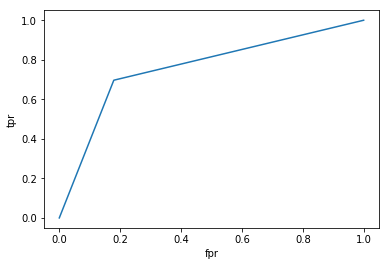

In [26]:
plt.plot(fpr,tpr)

plt.xlabel('fpr')
plt.ylabel('tpr')

In [36]:
krange=range(1,21)
k_score=[]

In [38]:
for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    pred=knn.score(X_test,Y_test)
    k_score.append(pred)

    

In [39]:
k_score

[0.7937219730941704,
 0.757847533632287,
 0.7982062780269058,
 0.7757847533632287,
 0.7713004484304933,
 0.7668161434977578,
 0.7757847533632287,
 0.7713004484304933,
 0.7802690582959642,
 0.7802690582959642,
 0.7802690582959642,
 0.7847533632286996,
 0.7713004484304933,
 0.7802690582959642,
 0.7757847533632287,
 0.7488789237668162,
 0.7488789237668162,
 0.757847533632287,
 0.7533632286995515,
 0.7533632286995515]

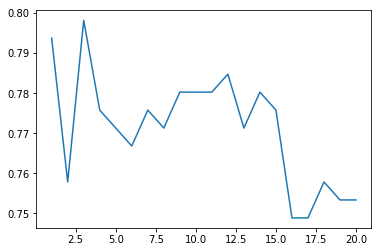

In [28]:
plt.plot(krange,k_scores)


In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

In [31]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
print(knn.score(X_test,Y_test))

0.7982062780269058
